In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data loading
file_path = Path("Resources/data.csv")
df = pd.read_csv(file_path)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,40
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,54
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,50
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,0,0,0,0,3,11,0,36
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,47
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,71


In [3]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [4]:
# feature creation

# Day, day of week, week, and month for last visit
df['ShoppingDay_month'] = df['Dt_Customer'].dt.month
df['ShoppingDay_day'] = df['Dt_Customer'].dt.day
df['ShoppingDay_dayofweek'] = df['Dt_Customer'].dt.dayofweek

#Total children in house
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Marital_Status"].replace({"Widow": 1, "Married":2, "Single":1,"Together":2, "Divorced": 1})+ df["Children"]
df

#Feature showing if customer is a parent or not
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

# Creating simpler feature for education
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Dropping data
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"], axis=1)

#Creating feature for Campaigns accepted total
df['TotalCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

#Creating feature for purchases made for all avenues
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [7]:
pd.set_option('display.max_columns', 50)
df

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,ShoppingDay_month,ShoppingDay_day,ShoppingDay_dayofweek,Children,Family_Size,Is_Parent,TotalCmp,NumTotalPurchases
0,1957,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,4,9,0,0,1,0,0,25
1,1954,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,8,3,6,2,3,1,0,6
2,1965,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,8,21,2,0,2,0,0,21
3,1984,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,10,2,3,1,3,1,0,8
4,1981,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,19,6,1,3,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,Graduate,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54,6,13,3,1,3,1,0,18
2212,1946,Postgraduate,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75,10,6,0,3,5,1,1,22
2213,1981,Graduate,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40,1,25,5,0,1,0,1,19
2214,1956,Postgraduate,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,65,1,24,4,1,3,1,0,23


In [103]:
spending = data.groupby(['Education']).agg(
            wine = ('MntWines', 'sum'),
             fruit = ('MntFruits','sum'),
             meat = ('MntMeatProducts','sum'),
            fish = ('MntFishProducts','sum'),
            sweets = ('MntSweetProducts','sum'),
            gold = ('MntGoldProds','sum')            
             ).reset_index()
spending.head()

spending["spending"] = spending.sum(axis=1)
spending


,Education,wine,fruit,meat,fish,sweets,gold,spending
0,2n Cycle,40169,5872,27016,9608,6945,9376,98986
1,Basic,391,600,618,921,654,1233,4417
2,Graduation,318111,34441,201319,48453,34915,56563,693802
3,Master,121538,7802,59466,11495,7595,14669,222565
4,PhD,195874,9690,81644,12928,9787,15586,325509


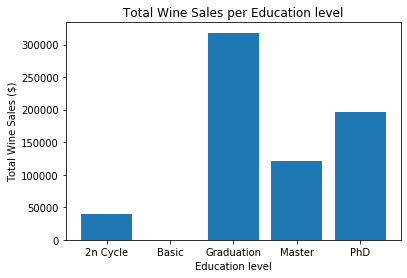

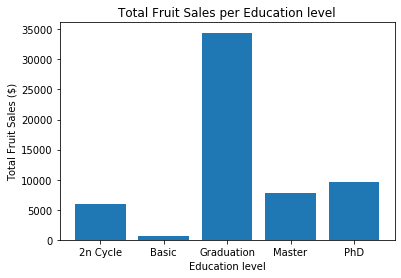

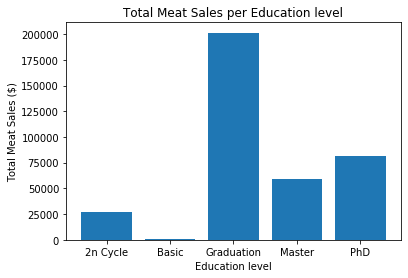

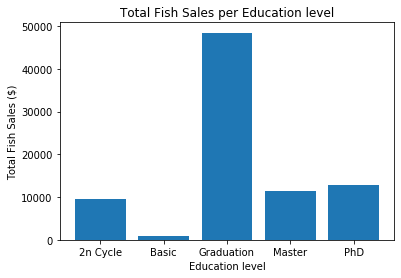

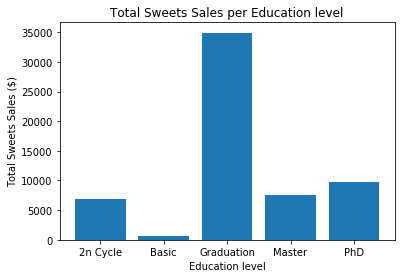

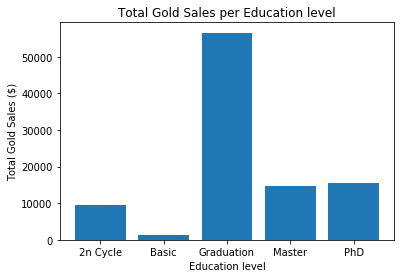

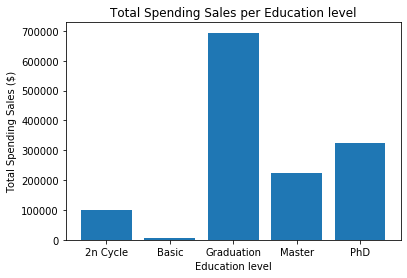

In [104]:
#Loop to create graphs for each of the above relationships


In [81]:
# Saving for later if needed
age_count = data["Age"].value_counts()
df = data["Age"].value_counts().rename_axis('Age').reset_index(name='count')
df.sort_values(by = ["Age"])

In [123]:
child_df = data.copy()


In [137]:
kid_home_df = child_df.groupby(['Kidhome']).agg(
            wine = ('MntWines', 'sum'),
             fruit = ('MntFruits','sum'),
             meat = ('MntMeatProducts','sum'),
            fish = ('MntFishProducts','sum'),
            sweets = ('MntSweetProducts','sum'),
            gold = ('MntGoldProds','sum')            
             ).reset_index()
kid_home_df["spending"] = kid_home_df.sum(axis=1)
kid_home_df.head()

,Kidhome,wine,fruit,meat,fish,sweets,gold,spending
0,0,580221,50551,325119,72195,52078,77038,1157202
1,1,92550,7576,43560,10894,7639,19613,181833
2,2,3312,278,1384,316,179,776,6247


In [132]:
teen_home_df = child_df.groupby(['Teenhome']).agg(
            wine = ('MntWines', 'sum'),
             fruit = ('MntFruits','sum'),
             meat = ('MntMeatProducts','sum'),
            fish = ('MntFishProducts','sum'),
            sweets = ('MntSweetProducts','sum'),
            gold = ('MntGoldProds','sum')            
             ).reset_index()
teen_home_df

,Teenhome,wine,fruit,meat,fish,sweets,gold
0,0,350940,38246,259936,55987,38482,51745
1,1,307060,19268,103811,26227,20628,43365
2,2,18083,891,6316,1191,786,2317
